In [1]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import json
import pickle

from os.path import join

In [2]:
gran_df = pd.DataFrame()
for i in range(1, 21):
    mini_df = pd.DataFrame()
    with open(join("data", f"listas_usuarios_{i}.pickle"), "rb") as archivo:
        listas = pickle.load(archivo)
    for user_id, value in listas.items():
        name = value.pop("nombre")
        tipo = value.pop("tipo")
        if tipo != "publica":
            continue
        value = {x[0]: x[1][0] for x in value.items() if (x[1][1] == 2) and (x[1][0] > 0)}
        if len(value) == 0:
            continue
        dato = {f"{user_id}:{name}": value}
        dato_df = pd.DataFrame.from_dict(dato, orient='columns')
        mini_df = pd.concat([mini_df, dato_df], axis=1)
    gran_df = pd.concat([gran_df, mini_df], axis=1)

In [6]:
pd.set_option('display.max_rows', 100)
gran_df

,39110:xxbladexx20,216949:haijuta,246587:d3athzero,107198:JayJay1401,45036:Seleare,4328:Joseph_,110895:Rudenick,93256:Moltke,160129:dander,256598:melandrea,...,16805797:iambabymango,16809902:Flopoflop,16791488:RhaenyraFR,16838607:SasOnator,17063891:Dezwhite05,17197026:dumb_zoro_,16617450:kotyboh,16459755:Tiberjuice,16965619:Watcher794_2,16656371:Aoto_uchiha10
24,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gran_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 24 to 33183
Columns: 7793 entries, 39110:xxbladexx20 to 16656371:Aoto_uchiha10
dtypes: float64(7793)
memory usage: 533.9 MB


In [4]:
# It is better to make this dataframe a sparse one
gran_df_sparse = gran_df.astype(pd.SparseDtype(np.float64, fill_value=np.nan))
gran_df_sparse.dtypes
gran_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 24 to 33183
Columns: 7793 entries, 39110:xxbladexx20 to 16656371:Aoto_uchiha10
dtypes: Sparse[float64, nan](7793)
memory usage: 6.5 MB


In [7]:
with open(join("research", "gran_df_sparse.pickle"), "wb") as archivo:
    pickle.dump(gran_df_sparse, archivo)

In [6]:
with open(join("research", "gran_df_sparse.pickle"), "rb") as archivo:
    gran_df_sparse = pickle.load(gran_df_sparse, archivo)

TypeError: Sparse pandas data (column 39110:xxbladexx20) not supported.

In [9]:
del gran_df

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N° Usuarios que dieron review - N° Usuarios')

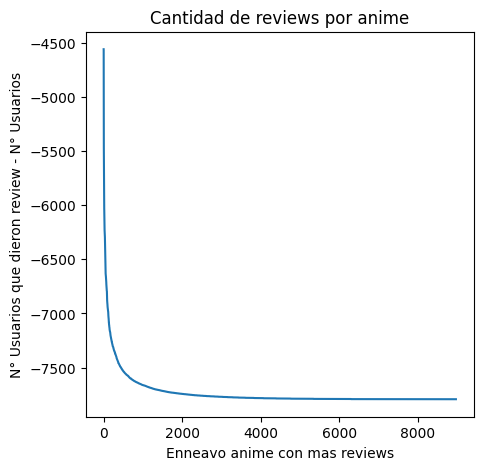

In [11]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=1).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Cantidad de reviews por anime")
plt.xlabel("Enneavo anime con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° Usuarios que dieron review - N° Usuarios",
           fontdict={"fontsize": 10})

Text(0, 0.5, 'N° reviews por usuario - N° animes')

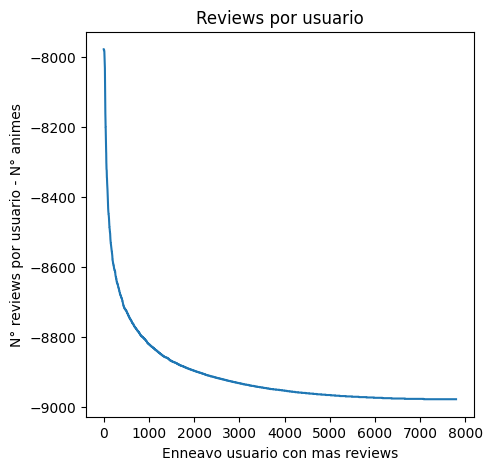

In [12]:
# Parcialmente inspirado en:
# https://stackoverflow.com/questions/45909776/sort-rows-of-a-dataframe-in-descending-order-of-nan-counts
serie_null = gran_df_sparse.isnull().sum(axis=0).mul(-1)
serie_null.sort_values(ascending=False, inplace=True)
serie_null.reset_index(drop=True, inplace=True)
plt.figure(figsize=(5, 5))
plt.plot(serie_null)
plt.title("Reviews por usuario")
plt.xlabel("Enneavo usuario con mas reviews",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 10})
plt.ylabel("N° reviews por usuario - N° animes",
           fontdict={"fontsize": 10})

In [13]:
gran_df_sparse.isnull().sum(axis=1).mul(-1)

24      -7623
125     -7769
193     -7720
260     -7775
261     -7782
         ... 
50575   -7792
50784   -7792
50973   -7792
56006   -7792
33183   -7792
Length: 8978, dtype: int32

In [17]:
# Adding a column and a row with number of nulls
gran_df_sparse["dif"] = gran_df_sparse.isnull().sum(axis=1).mul(-1)

# Adding a row
gran_df_sparse.loc["dif"] = gran_df_sparse.isnull().sum(axis=0).mul(-1)

In [18]:
gran_df_sparse

,39110:xxbladexx20,216949:haijuta,246587:d3athzero,107198:JayJay1401,45036:Seleare,4328:Joseph_,110895:Rudenick,93256:Moltke,160129:dander,256598:melandrea,...,16809902:Flopoflop,16791488:RhaenyraFR,16838607:SasOnator,17063891:Dezwhite05,17197026:dumb_zoro_,16617450:kotyboh,16459755:Tiberjuice,16965619:Watcher794_2,16656371:Aoto_uchiha10,dif
24,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7623
125,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7769
193,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7720
260,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7775
261,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7792
50973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7792
56006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7792
33183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7792


In [23]:
df_sort = gran_df_sparse.sort_values(by="dif", ascending=False, axis=1)
df_sort = df_sort.sort_values(by="dif", ascending=False, axis=0)

df_sort

,dif,5421545:Thanatos1K,6943932:Eschas_Tail,6357449:Jazz23089,17241571:Star_Tracer,4570759:TTX,7479683:RuGLo17,11390025:Pritamwolf,2604417:Akazenyan,5377465:Lastix,...,5100548:Rational,8090023:arissol,2639241:Krizzo,4915534:RozenDead,8341747:Sadovosh,15628435:Matheusmmi,13755854:koelinho25,4686102:SaffronGrey,3751731:francissama,14479837:cjaybenin
dif,0,-7978.0,-7978.0,-7978.0,-7978.0,-7979.0,-7979.0,-7979.0,-7980.0,-7981.0,...,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0,-8977.0
16498,-4562,7.0,NaN,8.0,7.0,8.0,10.0,9.0,7.0,9.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,-4570,9.0,8.0,6.0,6.0,NaN,10.0,9.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30276,-5215,10.0,NaN,8.0,9.0,8.0,9.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
11757,-5261,4.0,NaN,6.0,NaN,6.0,9.0,10.0,7.0,8.0,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13971,-7792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5871,-7792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36789,-7792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33205,-7792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
gran_df_sparse.fillna(0, inplace=True)

# We want to keep it sparse

gran_df_sparse = gran_df_sparse.astype(pd.SparseDtype(np.float64, fill_value=0))

In [ ]:
# gran_df_sparse.drop("dif", axis=1, inplace=True)
# gran_df_sparse.drop("dif", axis=0, inplace=True)

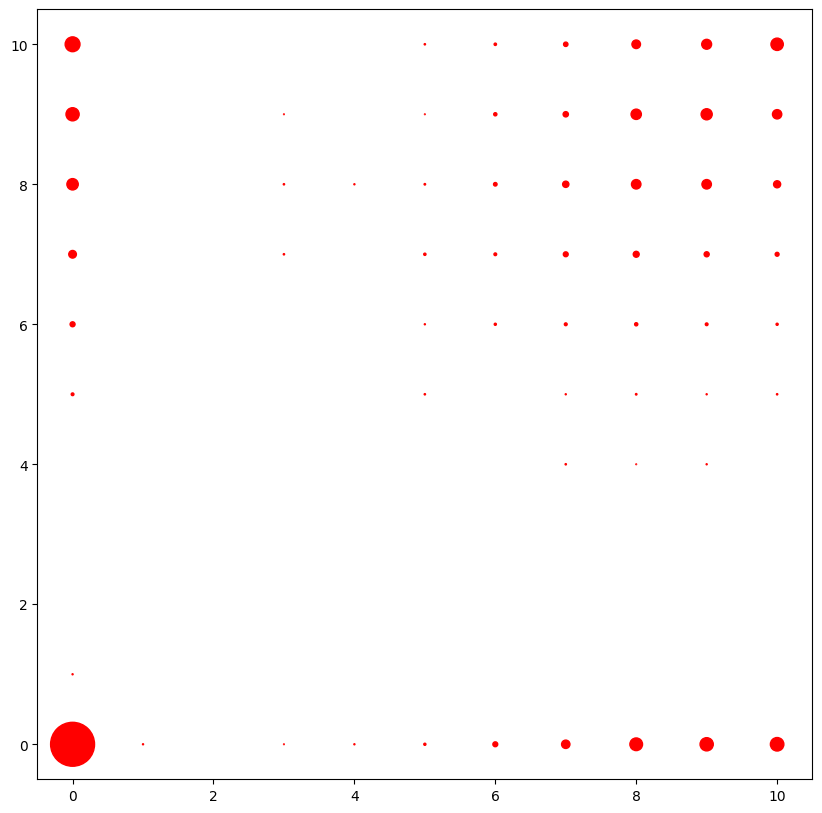

In [74]:
a = gran_df_sparse.loc[16498]
b = gran_df_sparse.loc[1535]

u, c = np.unique(np.c_[a,b], return_counts=True, axis=0)
plt.figure(figsize=(10, 10))
s = lambda x : 1000*(x-x.min())/float(x.max()-x.min())
plt.scatter(u[:,0], u[:,1], c="red", alpha=1, s=s(c))
plt.show()

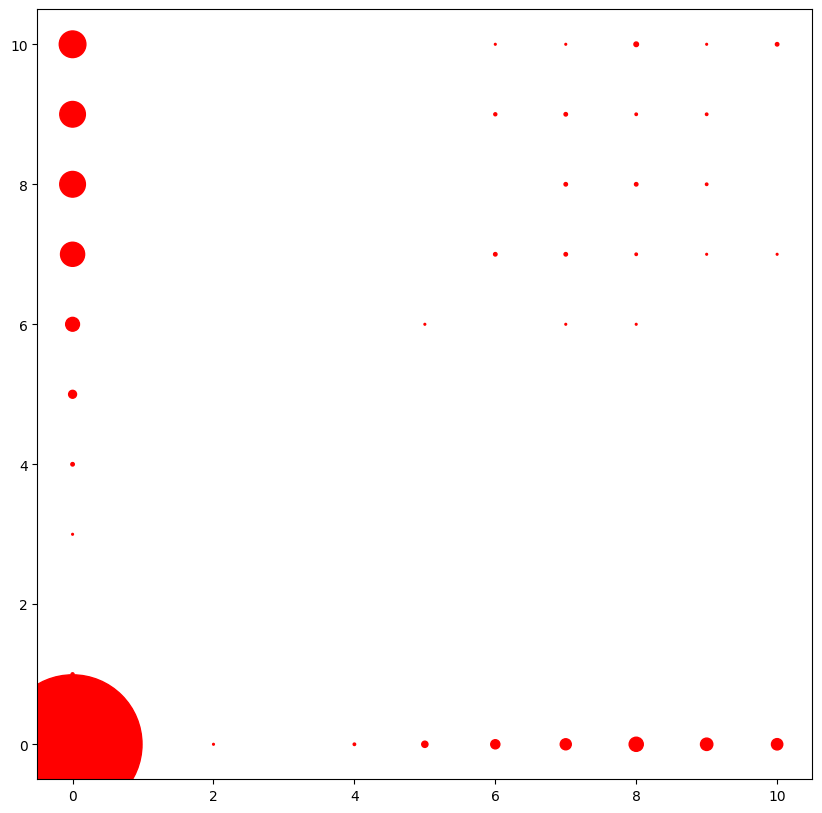

In [76]:
a = gran_df_sparse.loc[120]
b = gran_df_sparse.loc[813]

u, c = np.unique(np.c_[a,b], return_counts=True, axis=0)
plt.figure(figsize=(10, 10))
s = lambda x : 10000*(x-x.min())/float(x.max()-x.min())
plt.scatter(u[:,0], u[:,1], c="red", alpha=1, s=s(c))
plt.show()

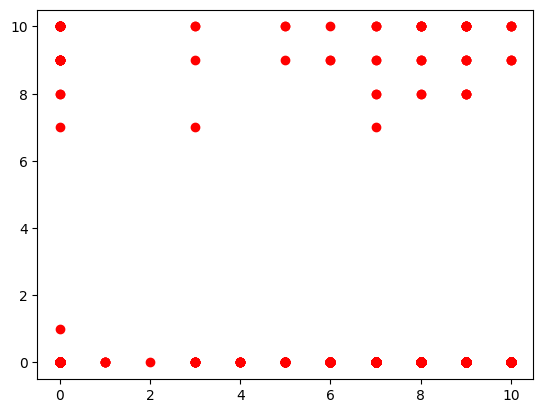

In [78]:
plt.scatter(a, b, c="red", alpha=1)

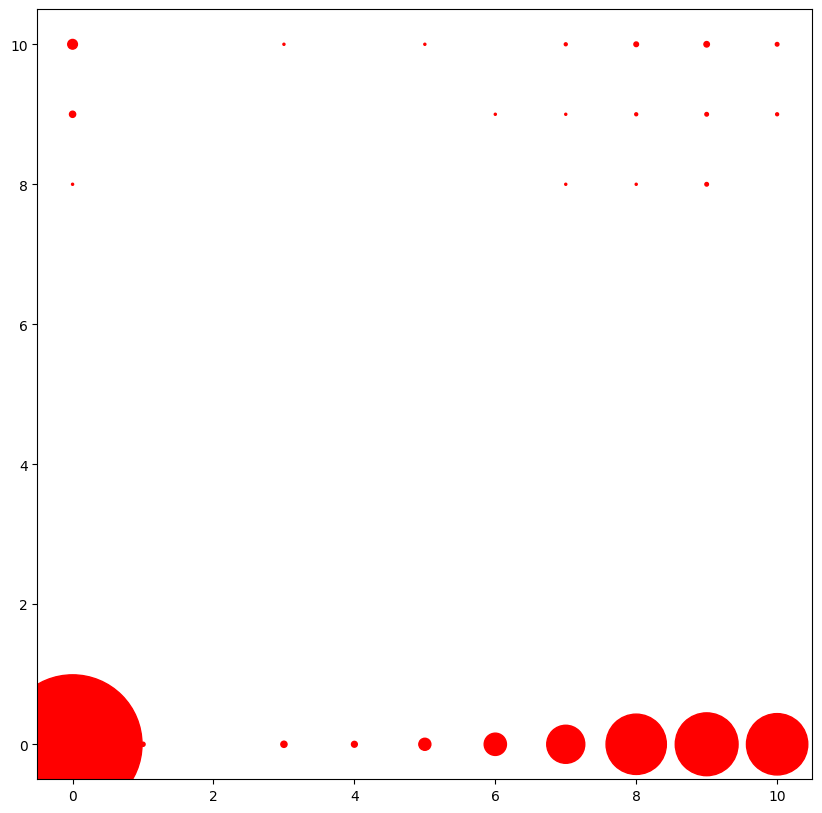

In [77]:
a = gran_df_sparse.loc[16498]
b = gran_df_sparse.loc[820]

u, c = np.unique(np.c_[a,b], return_counts=True, axis=0)
plt.figure(figsize=(10, 10))
s = lambda x : 10000*(x-x.min())/float(x.max()-x.min())
plt.scatter(u[:,0], u[:,1], c="red", alpha=1, s=s(c))
plt.show()

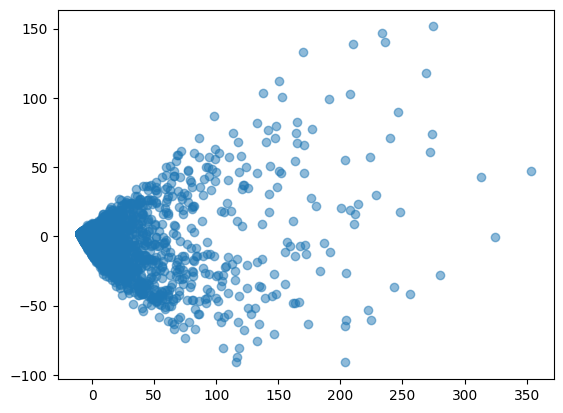

In [35]:
# Let's do pca on the data
from sklearn.decomposition import PCA

matriz = gran_df_sparse.to_numpy()

pca = PCA(n_components=2)
pca.fit(matriz)
X = pca.transform(matriz)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

In [36]:
pca.explained_variance_ratio_

array([0.17055482, 0.03261242])

In [39]:
X

array([[ 12.6825792 , -24.98438213],
       [ -5.78670086,  -4.30639204],
       [ -0.05491307, -12.65679095],
       ...,
       [ -9.2703304 ,   2.32993218],
       [ -9.24502016,   2.33510575],
       [ -9.43459497,   2.30203241]])

In [46]:
gran_df_sparse.loc[16498].eq(gran_df_sparse.loc[1535]).sum()

4167